**Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import tensorflow as tf
import sklearn 
import pandas_profiling as pp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Load Excel Dataset From Drive as Pandas dataframe**

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
df = pd.read_excel('/content/drive/My Drive/Samsung-Dataset(1).xlsx')

In [3]:
df

,ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,target
0,1460,-0.132150,0.665297,-0.064984,-0.682743,-1.670120,-2.038328,-0.545154,0.310710,1.383457,-1.451472,0.633721,0.946001,1.140179,0.027867,-0.271242,-0.891768,0.005398,1.260294,1.383457,-1.593896,1.859115,1.647762,0.417081,-0.398499,-0.582104,-1.019164,0.693587,0.548106,-0.018556,-2.306018,-0.591673,2.209171,0.899146,-0.682743,-1.980982,-0.509582,0.693587,0.785502,1.103054,...,-1.439986,0.658114,-0.682743,1.127636,-0.636977,0.280673,-1.588459,2.224664,-0.881774,0.174198,-1.720690,-0.306017,0.027867,1.593929,-0.509582,-0.545154,-0.045385,0.121645,-0.312077,0.940070,-0.738225,-0.306017,-0.682743,-1.203828,-0.764373,0.005398,-0.757573,0.121645,-0.881774,-1.204370,-1.861042,-0.547050,0.027867,0.195051,-1.528746,-0.820430,-0.520177,-0.018556,0.115196,0
1,2004,-2.340037,1.379465,-1.416908,1.058687,-0.925641,-1.997925,0.020832,0.984306,-0.941658,0.556491,-3.766078,2.008668,0.556873,-0.047242,-2.336141,-1.829226,1.508243,1.159523,0.601300,-2.109132,-2.340037,1.536766,0.776182,1.532656,-1.807203,-1.829226,1.508243,3.086908,1.758518,-0.227516,-3.053057,1.379465,-0.101054,1.058687,-2.865078,-1.154430,-0.616630,1.860390,0.601300,...,0.121060,0.337564,-0.047242,-1.278266,0.363861,0.233319,0.458656,0.794169,0.086087,0.868557,0.121060,0.337564,-0.047242,-1.278266,0.363861,0.233319,0.458656,0.794169,0.086087,-0.200974,0.750263,0.337564,0.268738,0.132234,0.869958,0.020832,1.159523,1.565648,0.399690,-0.200974,0.750263,0.337564,0.268738,0.132234,0.869958,0.020832,1.159523,1.565648,0.399690,0
2,1822,-3.305077,3.269503,1.101463,3.050656,-3.698528,-0.439945,2.060245,2.811025,1.980355,2.000909,-3.305077,3.269503,1.101463,3.050656,-3.698528,-0.439945,2.060245,2.811025,1.980355,2.000909,-2.099290,2.962211,2.664971,2.640686,-0.869861,0.022678,1.376476,3.356302,2.300603,0.377905,-1.697361,1.733040,2.441613,1.615762,0.827339,-1.596502,1.604399,2.811025,1.179736,...,0.657516,-0.015329,-0.434085,-0.492706,0.022678,0.464784,-0.097116,0.379117,-0.839348,-0.089646,0.657516,-0.015329,-0.434085,-0.492706,0.022678,0.464784,-0.097116,0.379117,-0.839348,-0.893504,-0.110716,-0.908762,-0.639070,-1.058439,-1.133880,0.236861,-0.642393,0.379117,-0.230721,-0.692539,-0.418008,-0.462045,-0.844055,-0.304128,-2.290437,0.236861,-0.278875,-0.421502,-0.839348,0
3,2312,-2.393572,2.283466,1.314250,1.741767,-2.545204,-1.107955,3.630136,1.581411,1.489944,0.171793,-2.223199,1.470150,-0.805935,1.595545,-2.727836,-2.149535,0.216646,1.175274,0.905802,0.171793,-3.756555,1.266820,0.543274,0.718210,-1.632046,-2.670325,1.294590,1.310653,1.100516,-1.338798,-2.052826,0.250175,0.736018,0.864433,-1.266783,-1.975938,1.114932,1.446032,2.463513,...,0.656833,1.314250,-2.352461,1.107428,-0.239972,0.575960,-2.479955,-0.067768,-1.489857,-0.689843,-1.173130,-1.191423,-0.744014,1.472691,-0.413568,0.755618,-0.855409,-0.262482,-0.281385,0.843513,-0.156484,1.121506,-2.352461,2.020586,-0.760762,1.833562,-2.344576,-0.262482,-1.943034,0.843513,-0.766471,-0.034958,-1.036459,0.924796,-0.934358,0.755618,-0.855409,-0.651910,-1.187739,0
4,509,-2.688217,0.092939,-0.776521,1.704945,-3.512088,-0.486106,-1.069824,1.906976,2.936643,1.905975,-1.869715,0.303601,-1.241749,0.561375,-2.969585,-2.534277,-0.417050,0.374182,1.882861,0.628017,-2.483591,1.356910,1.782235,-0.582196,-2.065413,-1.680872,1.323681,1.293858,1.355970,-1.768156,-3.506719,1.146249,1.317007,1.051476,-1.342075,-0.998149,1.106090,2.213535,0.477818,...,-0.539047,0.851778,0.724742,-0.980406,-0.656787,0.670907,1.140579,2.058491,1.107251,0.381165,-1.171032,0.153936,-0.908930,-1.884578,-0.998149,0.235724,-0.852053,-0.224704,-0.969432,0.585791,-0.749708,2.712692,-0.582196,0.104600,-1.339510,0.888498,-1.005332,2.058491,-0.809687,-0.028086,0.514263,-0

In [4]:
df.drop('ID',axis = 1,inplace = True)

In [5]:
df.reset_index(drop=True,inplace = True)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,target
0,-0.132150,0.665297,-0.064984,-0.682743,-1.670120,-2.038328,-0.545154,0.310710,1.383457,-1.451472,0.633721,0.946001,1.140179,0.027867,-0.271242,-0.891768,0.005398,1.260294,1.383457,-1.593896,1.859115,1.647762,0.417081,-0.398499,-0.582104,-1.019164,0.693587,0.548106,-0.018556,-2.306018,-0.591673,2.209171,0.899146,-0.682743,-1.980982,-0.509582,0.693587,0.785502,1.103054,-2.021169,...,-1.439986,0.658114,-0.682743,1.127636,-0.636977,0.280673,-1.588459,2.224664,-0.881774,0.174198,-1.720690,-0.306017,0.027867,1.593929,-0.509582,-0.545154,-0.045385,0.121645,-0.312077,0.940070,-0.738225,-0.306017,-0.682743,-1.203828,-0.764373,0.005398,-0.757573,0.121645,-0.881774,-1.204370,-1.861042,-0.547050,0.027867,0.195051,-1.528746,-0.820430,-0.520177,-0.018556,0.115196,0
1,-2.340037,1.379465,-1.416908,1.058687,-0.925641,-1.997925,0.020832,0.984306,-0.941658,0.556491,-3.766078,2.008668,0.556873,-0.047242,-2.336141,-1.829226,1.508243,1.159523,0.601300,-2.109132,-2.340037,1.536766,0.776182,1.532656,-1.807203,-1.829226,1.508243,3.086908,1.758518,-0.227516,-3.053057,1.379465,-0.101054,1.058687,-2.865078,-1.154430,-0.616630,1.860390,0.601300,-0.384317,...,0.121060,0.337564,-0.047242,-1.278266,0.363861,0.233319,0.458656,0.794169,0.086087,0.868557,0.121060,0.337564,-0.047242,-1.278266,0.363861,0.233319,0.458656,0.794169,0.086087,-0.200974,0.750263,0.337564,0.268738,0.132234,0.869958,0.020832,1.159523,1.565648,0.399690,-0.200974,0.750263,0.337564,0.268738,0.132234,0.869958,0.020832,1.159523,1.565648,0.399690,0
2,-3.305077,3.269503,1.101463,3.050656,-3.698528,-0.439945,2.060245,2.811025,1.980355,2.000909,-3.305077,3.269503,1.101463,3.050656,-3.698528,-0.439945,2.060245,2.811025,1.980355,2.000909,-2.099290,2.962211,2.664971,2.640686,-0.869861,0.022678,1.376476,3.356302,2.300603,0.377905,-1.697361,1.733040,2.441613,1.615762,0.827339,-1.596502,1.604399,2.811025,1.179736,-0.230721,...,0.657516,-0.015329,-0.434085,-0.492706,0.022678,0.464784,-0.097116,0.379117,-0.839348,-0.089646,0.657516,-0.015329,-0.434085,-0.492706,0.022678,0.464784,-0.097116,0.379117,-0.839348,-0.893504,-0.110716,-0.908762,-0.639070,-1.058439,-1.133880,0.236861,-0.642393,0.379117,-0.230721,-0.692539,-0.418008,-0.462045,-0.844055,-0.304128,-2.290437,0.236861,-0.278875,-0.421502,-0.839348,0
3,-2.393572,2.283466,1.314250,1.741767,-2.545204,-1.107955,3.630136,1.581411,1.489944,0.171793,-2.223199,1.470150,-0.805935,1.595545,-2.727836,-2.149535,0.216646,1.175274,0.905802,0.171793,-3.756555,1.266820,0.543274,0.718210,-1.632046,-2.670325,1.294590,1.310653,1.100516,-1.338798,-2.052826,0.250175,0.736018,0.864433,-1.266783,-1.975938,1.114932,1.446032,2.463513,-1.036680,...,0.656833,1.314250,-2.352461,1.107428,-0.239972,0.575960,-2.479955,-0.067768,-1.489857,-0.689843,-1.173130,-1.191423,-0.744014,1.472691,-0.413568,0.755618,-0.855409,-0.262482,-0.281385,0.843513,-0.156484,1.121506,-2.352461,2.020586,-0.760762,1.833562,-2.344576,-0.262482,-1.943034,0.843513,-0.766471,-0.034958,-1.036459,0.924796,-0.934358,0.755618,-0.855409,-0.651910,-1.187739,0
4,-2.688217,0.092939,-0.776521,1.704945,-3.512088,-0.486106,-1.069824,1.906976,2.936643,1.905975,-1.869715,0.303601,-1.241749,0.561375,-2.969585,-2.534277,-0.417050,0.374182,1.882861,0.628017,-2.483591,1.356910,1.782235,-0.582196,-2.065413,-1.680872,1.323681,1.293858,1.355970,-1.768156,-3.506719,1.146249,1.317007,1.051476,-1.342075,-0.998149,1.106090,2.213535,0.477818,-0.490197,...,-0.539047,0.851778,0.724742,-0.980406,-0.656787,0.670907,1.140579,2.058491,1.107251,0.381165,-1.171032,0.153936,-0.908930,-1.884578,-0.998149,0.235724,-0.852053,-0.224704,-0.969432,0.585791,-0.749708,2.712692,-0.582196,0.104600,-1.339510,0.888498,-1.005332,2.058491,-0.80

<b>Describe Dataset</b>

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,target
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,400.00000
mean,-2.454315,1.387525,0.034654,0.693258,-1.810482,-1.280029,0.644129,0.779307,0.912637,0.162043,-2.051552,1.470693,0.289146,0.179577,-1.893747,-1.945391,0.407432,0.976804,0.616027,-0.752127,-1.788232,1.501368,0.559434,0.335161,-1.546240,-1.722137,0.384071,1.581694,0.468762,-1.155349,-1.538077,1.216705,0.526669,0.251725,-1.479044,-1.419698,0.364926,1.490784,0.448514,-1.173486,...,-0.102028,0.442036,-0.216881,0.199338,-0.226220,0.339924,-0.122922,0.274821,-0.249224,0.288565,-0.158734,0.447866,-0.292758,0.143865,-0.217508,0.361335,-0.155267,0.316935,-0.310322,0.304979,-0.143637,0.555692,-0.143037,0.247436,-0.265772,0.410603,-0.139601,0.394063,-0.192679,0.312946,-0.207837,0.475036,-0.345069,0.033433,-0.239941,0.376155,-0.184311,0.256586,-0.327967,0.50250
std,1.723203,1.163211,1.675725,1.220413,1.502385,1.401594,1.560529,1.153789,1.656863,1.322420,1.328573,0.974423,1.476974,1.100646,1.218148,1.098172,1.331623,1.143116,1.349144,1.439796,1.284330,1.012342,1.468372,1.077746,1.285874,1.129223,1.375108,1.075448,1.330063,1.029521,1.144959,1.077144,1.193562,1.106580,1.081473,1.061751,1.186416,1.042319,1.226882,1.022369,...,0.898069,0.986417,0.959141,0.940498,0.929101,0.981664,0.877047,1.049446,0.968708,0.894869,0.925681,0.966138,0.927476,0.954981,0.862991,1.007792,0.896086,0.984801,0.889129,0.916085,0.935598,0.951458,0.959365,1.001029,0.898303,1.015294,0.865962,0.976555,0.922662,0.873443,0.963188,0.957775,0.992042,1.004202,0.882522,0.993618,0.925765,0.985313,0.917378,0.50062
min,-8.636380,-2.452950,-3.742616,-2.784115,-6.877709,-6.893295,-3.291058,-2.758156,-3.522823,-4.777305,-5.614829,-1.947094,-3.679008,-3.547624,-4.819420,-4.445811,-3.291058,-1.901594,-2.820681,-4.630311,-5.212749,-0.901716,-3.462836,-2.932581,-4.897685,-4.314864,-4.130498,-2.296384,-3.719764,-3.995237,-4.287153,-2.649447,-2.809563,-3.308771,-4.457589,-4.710996,-2.695523,-1.612161,-3.029769,-3.943682,...,-2.453025,-3.896418,-2.807392,-3.023350,-3.750133,-3.511157,-2.569682,-4.017224,-3.831496,-2.632152,-2.680563,-3.896418,-2.753210,-3.187271,-2.525843,-3.875984,-3.226424,-3.270685,-2.529757,-2.791204,-2.664597,-3.544965,-3.267664,-2.588258,-3.566465,-3.511157,-2.864599,-2.710780,-2.937870,-2.950256,-3.047872,-4.130720,-3.267664,-3.702843,-3.075611,-3.389549,-2.257152,-3.452195,-2.952665,0.00000
25%,-3.460833,0.620216,-1.146328,-0.122309,-2.693573,-2.149933,-0.403202,0.030913,-0.185079,-0.631066,-3.008234,0.780772,-0.717346,-0.485056,-2.754874,-2.718425,-0.417633,0.269861,-0.236272,-1.790684,-2.730421,0.781917,-0.316369,-0.454091,-2.473517,-2.500078,-0.485758,0.820800,-0.330477,-1.841349,-2.412125,0.460654,-0.318582,-0.525790,-2.224309,-2.064488,-0.439803,0.821411,-0.327144,-1.873170,...,-0.726458,-0.150067,-0.857240,-0.450618,-0.888874,-0.313179,-0.732222,-0.414282,-0.948386,-0.30682

**Print few rows**

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,target
0,-0.132150,0.665297,-0.064984,-0.682743,-1.670120,-2.038328,-0.545154,0.310710,1.383457,-1.451472,0.633721,0.946001,1.140179,0.027867,-0.271242,-0.891768,0.005398,1.260294,1.383457,-1.593896,1.859115,1.647762,0.417081,-0.398499,-0.582104,-1.019164,0.693587,0.548106,-0.018556,-2.306018,-0.591673,2.209171,0.899146,-0.682743,-1.980982,-0.509582,0.693587,0.785502,1.103054,-2.021169,...,-1.439986,0.658114,-0.682743,1.127636,-0.636977,0.280673,-1.588459,2.224664,-0.881774,0.174198,-1.720690,-0.306017,0.027867,1.593929,-0.509582,-0.545154,-0.045385,0.121645,-0.312077,0.940070,-0.738225,-0.306017,-0.682743,-1.203828,-0.764373,0.005398,-0.757573,0.121645,-0.881774,-1.204370,-1.861042,-0.547050,0.027867,0.195051,-1.528746,-0.820430,-0.520177,-0.018556,0.115196,0
1,-2.340037,1.379465,-1.416908,1.058687,-0.925641,-1.997925,0.020832,0.984306,-0.941658,0.556491,-3.766078,2.008668,0.556873,-0.047242,-2.336141,-1.829226,1.508243,1.159523,0.601300,-2.109132,-2.340037,1.536766,0.776182,1.532656,-1.807203,-1.829226,1.508243,3.086908,1.758518,-0.227516,-3.053057,1.379465,-0.101054,1.058687,-2.865078,-1.154430,-0.616630,1.860390,0.601300,-0.384317,...,0.121060,0.337564,-0.047242,-1.278266,0.363861,0.233319,0.458656,0.794169,0.086087,0.868557,0.121060,0.337564,-0.047242,-1.278266,0.363861,0.233319,0.458656,0.794169,0.086087,-0.200974,0.750263,0.337564,0.268738,0.132234,0.869958,0.020832,1.159523,1.565648,0.399690,-0.200974,0.750263,0.337564,0.268738,0.132234,0.869958,0.020832,1.159523,1.565648,0.399690,0
2,-3.305077,3.269503,1.101463,3.050656,-3.698528,-0.439945,2.060245,2.811025,1.980355,2.000909,-3.305077,3.269503,1.101463,3.050656,-3.698528,-0.439945,2.060245,2.811025,1.980355,2.000909,-2.099290,2.962211,2.664971,2.640686,-0.869861,0.022678,1.376476,3.356302,2.300603,0.377905,-1.697361,1.733040,2.441613,1.615762,0.827339,-1.596502,1.604399,2.811025,1.179736,-0.230721,...,0.657516,-0.015329,-0.434085,-0.492706,0.022678,0.464784,-0.097116,0.379117,-0.839348,-0.089646,0.657516,-0.015329,-0.434085,-0.492706,0.022678,0.464784,-0.097116,0.379117,-0.839348,-0.893504,-0.110716,-0.908762,-0.639070,-1.058439,-1.133880,0.236861,-0.642393,0.379117,-0.230721,-0.692539,-0.418008,-0.462045,-0.844055,-0.304128,-2.290437,0.236861,-0.278875,-0.421502,-0.839348,0
3,-2.393572,2.283466,1.314250,1.741767,-2.545204,-1.107955,3.630136,1.581411,1.489944,0.171793,-2.223199,1.470150,-0.805935,1.595545,-2.727836,-2.149535,0.216646,1.175274,0.905802,0.171793,-3.756555,1.266820,0.543274,0.718210,-1.632046,-2.670325,1.294590,1.310653,1.100516,-1.338798,-2.052826,0.250175,0.736018,0.864433,-1.266783,-1.975938,1.114932,1.446032,2.463513,-1.036680,...,0.656833,1.314250,-2.352461,1.107428,-0.239972,0.575960,-2.479955,-0.067768,-1.489857,-0.689843,-1.173130,-1.191423,-0.744014,1.472691,-0.413568,0.755618,-0.855409,-0.262482,-0.281385,0.843513,-0.156484,1.121506,-2.352461,2.020586,-0.760762,1.833562,-2.344576,-0.262482,-1.943034,0.843513,-0.766471,-0.034958,-1.036459,0.924796,-0.934358,0.755618,-0.855409,-0.651910,-1.187739,0
4,-2.688217,0.092939,-0.776521,1.704945,-3.512088,-0.486106,-1.069824,1.906976,2.936643,1.905975,-1.869715,0.303601,-1.241749,0.561375,-2.969585,-2.534277,-0.417050,0.374182,1.882861,0.628017,-2.483591,1.356910,1.782235,-0.582196,-2.065413,-1.680872,1.323681,1.293858,1.355970,-1.768156,-3.506719,1.146249,1.317007,1.051476,-1.342075,-0.998149,1.106090,2.213535,0.477818,-0.490197,...,-0.539047,0.851778,0.724742,-0.980406,-0.656787,0.670907,1.140579,2.058491,1.107251,0.381165,-1.171032,0.153936,-0.908930,-1.884578,-0.998149,0.235724,-0.852053,-0.224704,-0.969432,0.585791,-0.749708,2.712692,-0.582196,0.104600,-1.339510,0.888498,-1.005332,2.058491,-0.80

**Get total number of target types**

In [9]:
df['target'].value_counts()

1    201
0    199
Name: target, dtype: int64


<h1>Data Set Analysis</h1>





Rows with Nan values

In [10]:
print(df[df.isna().any(axis=1)])


            0         1         2         3  ...  2037  2038  2039  target
106 -1.029143  1.518058 -0.321229  0.163357  ...   NaN   NaN   NaN       0
107 -4.437154  0.533476  0.388561  0.565787  ...   NaN   NaN   NaN       1
349 -4.077707  1.728920  2.437987  2.475241  ...   NaN   NaN   NaN       1

[3 rows x 2041 columns]


We will remove those three rows

In [11]:
df.dropna(inplace = True)

In [12]:
df.reset_index(drop=True,inplace = True)

Check for duplicated rows

In [13]:
df[df.duplicated(keep=False)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,target


There are no duplicate rows

Lets split dataset to features and labels

In [14]:
features,labels = df.iloc[:,:-1],df['target']

In [15]:
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
0,-0.132150,0.665297,-0.064984,-0.682743,-1.670120,-2.038328,-0.545154,0.310710,1.383457,-1.451472,0.633721,0.946001,1.140179,0.027867,-0.271242,-0.891768,0.005398,1.260294,1.383457,-1.593896,1.859115,1.647762,0.417081,-0.398499,-0.582104,-1.019164,0.693587,0.548106,-0.018556,-2.306018,-0.591673,2.209171,0.899146,-0.682743,-1.980982,-0.509582,0.693587,0.785502,1.103054,-2.021169,...,0.480547,-1.439986,0.658114,-0.682743,1.127636,-0.636977,0.280673,-1.588459,2.224664,-0.881774,0.174198,-1.720690,-0.306017,0.027867,1.593929,-0.509582,-0.545154,-0.045385,0.121645,-0.312077,0.940070,-0.738225,-0.306017,-0.682743,-1.203828,-0.764373,0.005398,-0.757573,0.121645,-0.881774,-1.204370,-1.861042,-0.547050,0.027867,0.195051,-1.528746,-0.820430,-0.520177,-0.018556,0.115196
1,-2.340037,1.379465,-1.416908,1.058687,-0.925641,-1.997925,0.020832,0.984306,-0.941658,0.556491,-3.766078,2.008668,0.556873,-0.047242,-2.336141,-1.829226,1.508243,1.159523,0.601300,-2.109132,-2.340037,1.536766,0.776182,1.532656,-1.807203,-1.829226,1.508243,3.086908,1.758518,-0.227516,-3.053057,1.379465,-0.101054,1.058687,-2.865078,-1.154430,-0.616630,1.860390,0.601300,-0.384317,...,0.868557,0.121060,0.337564,-0.047242,-1.278266,0.363861,0.233319,0.458656,0.794169,0.086087,0.868557,0.121060,0.337564,-0.047242,-1.278266,0.363861,0.233319,0.458656,0.794169,0.086087,-0.200974,0.750263,0.337564,0.268738,0.132234,0.869958,0.020832,1.159523,1.565648,0.399690,-0.200974,0.750263,0.337564,0.268738,0.132234,0.869958,0.020832,1.159523,1.565648,0.399690
2,-3.305077,3.269503,1.101463,3.050656,-3.698528,-0.439945,2.060245,2.811025,1.980355,2.000909,-3.305077,3.269503,1.101463,3.050656,-3.698528,-0.439945,2.060245,2.811025,1.980355,2.000909,-2.099290,2.962211,2.664971,2.640686,-0.869861,0.022678,1.376476,3.356302,2.300603,0.377905,-1.697361,1.733040,2.441613,1.615762,0.827339,-1.596502,1.604399,2.811025,1.179736,-0.230721,...,-0.089646,0.657516,-0.015329,-0.434085,-0.492706,0.022678,0.464784,-0.097116,0.379117,-0.839348,-0.089646,0.657516,-0.015329,-0.434085,-0.492706,0.022678,0.464784,-0.097116,0.379117,-0.839348,-0.893504,-0.110716,-0.908762,-0.639070,-1.058439,-1.133880,0.236861,-0.642393,0.379117,-0.230721,-0.692539,-0.418008,-0.462045,-0.844055,-0.304128,-2.290437,0.236861,-0.278875,-0.421502,-0.839348
3,-2.393572,2.283466,1.314250,1.741767,-2.545204,-1.107955,3.630136,1.581411,1.489944,0.171793,-2.223199,1.470150,-0.805935,1.595545,-2.727836,-2.149535,0.216646,1.175274,0.905802,0.171793,-3.756555,1.266820,0.543274,0.718210,-1.632046,-2.670325,1.294590,1.310653,1.100516,-1.338798,-2.052826,0.250175,0.736018,0.864433,-1.266783,-1.975938,1.114932,1.446032,2.463513,-1.036680,...,1.525004,0.656833,1.314250,-2.352461,1.107428,-0.239972,0.575960,-2.479955,-0.067768,-1.489857,-0.689843,-1.173130,-1.191423,-0.744014,1.472691,-0.413568,0.755618,-0.855409,-0.262482,-0.281385,0.843513,-0.156484,1.121506,-2.352461,2.020586,-0.760762,1.833562,-2.344576,-0.262482,-1.943034,0.843513,-0.766471,-0.034958,-1.036459,0.924796,-0.934358,0.755618,-0.855409,-0.651910,-1.187739
4,-2.688217,0.092939,-0.776521,1.704945,-3.512088,-0.486106,-1.069824,1.906976,2.936643,1.905975,-1.869715,0.303601,-1.241749,0.561375,-2.969585,-2.534277,-0.417050,0.374182,1.882861,0.628017,-2.483591,1.356910,1.782235,-0.582196,-2.065413,-1.680872,1.323681,1.293858,1.355970,-1.768156,-3.506719,1.146249,1.317007,1.051476,-1.342075,-0.998149,1.106090,2.213535,0.477818,-0.490197,...,-1.460464,-0.539047,0.851778,0.724742,-0.980406,-0.656787,0.670907,1.140579,2.058491,1.107251,0.381165,-1.171032,0.153936,-0.908930,-1.884578,-0.998149,0.235724,-0.852053,-0.224704,-0.969432,0.585791,-0.749708,2.712692,-0.582196,0.104600,-1.339

In [16]:
labels

0      0
1      0
2      0
3      0
4      1
      ..
392    0
393    0
394    1
395    1
396    0
Name: target, Length: 397, dtype: int64

In [17]:
print(df[df.isna().any(axis=1)])

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 2041 columns]


**Feature Analysis**

In [18]:
feature_ds = features.describe()

In [19]:
feature_ds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,...,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,-2.448821,1.388488,0.028605,0.690425,-1.797613,-1.286016,0.636561,0.780232,0.904659,0.153281,-2.048602,1.466314,0.279178,0.173572,-1.898643,-1.948009,0.398531,0.973214,0.617367,-0.755108,-1.782870,1.496286,0.553577,0.332196,-1.544851,-1.725377,0.374502,1.579852,0.474694,-1.156861,-1.532825,1.207985,0.520563,0.239693,-1.475816,-1.419921,0.360729,1.482571,0.445143,-1.184527,...,0.251010,-0.105988,0.438458,-0.216460,0.204693,-0.219393,0.336536,-0.128380,0.273552,-0.244050,0.293960,-0.160503,0.451343,-0.292303,0.145630,-0.214225,0.363497,-0.154749,0.316610,-0.310721,0.307245,-0.148499,0.557710,-0.143385,0.244683,-0.266928,0.411530,-0.139986,0.392330,-0.193000,0.312946,-0.207837,0.475036,-0.345069,0.033433,-0.239941,0.376155,-0.184311,0.256586,-0.327967
std,1.723422,1.166675,1.677519,1.221440,1.499536,1.401970,1.562593,1.156131,1.659335,1.319085,1.332713,0.975693,1.477637,1.100113,1.220145,1.101406,1.332262,1.146503,1.349940,1.437815,1.287061,1.012732,1.471847,1.080247,1.287191,1.130668,1.375296,1.078978,1.333183,1.029825,1.144757,1.074589,1.195353,1.097656,1.082307,1.064672,1.188645,1.038500,1.228928,1.012157,...,0.860068,0.896584,0.988450,0.962072,0.940836,0.928417,0.982956,0.876158,1.049581,0.970446,0.894962,0.922292,0.965166,0.927227,0.957368,0.862986,1.008005,0.895537,0.985762,0.889659,0.914100,0.935385,0.952024,0.959979,1.003377,0.901056,1.016190,0.865636,0.977884,0.923787,0.873443,0.963188,0.957775,0.992042,1.004202,0.882522,0.993618,0.925765,0.985313,0.917378
min,-8.636380,-2.452950,-3.742616,-2.784115,-6.877709,-6.893295,-3.291058,-2.758156,-3.522823,-4.777305,-5.614829,-1.947094,-3.679008,-3.547624,-4.819420,-4.445811,-3.291058,-1.901594,-2.820681,-4.630311,-5.212749,-0.901716,-3.462836,-2.932581,-4.897685,-4.314864,-4.130498,-2.296384,-3.719764,-3.995237,-4.287153,-2.649447,-2.809563,-3.308771,-4.457589,-4.710996,-2.695523,-1.612161,-3.029769,-3.943682,...,-3.363314,-2.453025,-3.896418,-2.807392,-3.023350,-3.750133,-3.511157,-2.569682,-4.017224,-3.831496,-2.632152,-2.680563,-3.896418,-2.753210,-3.187271,-2.525843,-3.875984,-3.226424,-3.270685,-2.529757,-2.791204,-2.664597,-3.544965,-3.267664,-2.588258,-3.566465,-3.511157,-2.864599,-2.710780,-2.937870,-2.950256,-3.047872,-4.130720,-3.267664,-3.702843,-3.075611,-3.389549,-2.257152,-3.452195,-2.952665
25%,-3.445472,0.621015,-1.166011,-0.155402,-2.683064,-2.172162,-0.405260,0.031592,-0.208923,-0.632643,-3.025979,0.775799,-0.721713,-0.485174,-2.761018,-2.721085,-0.419383,0.255834,-0.235925,-1.787769,-2.719817,0.779769,-0.318798,-0.462305,-2.473292,-2.501803,-0.510531,0.819945,-0.326715,-1.839717,-2.397016,0.459944,-0.325000,-0.532826,-2.221899,-2.076828,-0.465630,0.811643,-0.328431,-1.874348,...,-0.278472,-0.720133,-0.153875,-0.873847,-0.450219,-0.887954,-0.313377,-0.733649,-0.411932,-0.94

There are 2040 features

**Lets use scikit learn's select percentile to select the best features**

In [20]:
from sklearn.feature_selection import SelectPercentile,f_classif

**We will select top 1% features**

We will use ANOVA F-value for scoring as it is better suited for classification problems.

In [21]:
selected_features = SelectPercentile(f_classif, percentile=1).fit_transform(features.values, labels.values)

In [22]:
selected_features.shape

(397, 21)

**Now we have 21 features**

**Split dataset to train and test**

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels,train_size=0.8,random_state=42,stratify=labels)


In [24]:
X_train.shape,y_train.shape

((317, 2040), (317,))

**Now the dataset is split into training set(80%),  and test set(20%)**

--------------------------------------------------------------------------------

**We will create  classifier pipeleines and model performance**

**As the dataset is small and almost balanced and  as it works very well with dataset with too many features, we will try logistic regression and svm**

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate,learning_curve,validation_curve,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
# scoring = {'accuracy' : make_scorer(accuracy_score), 
#            'precision' : make_scorer(precision_score),
#            'recall' : make_scorer(recall_score), 
#            'f1_score' : make_scorer(f1_score,average = 'micro')}

cv_n = 10 #Split parameter for all cross validation and learning curve plot

In [26]:
def plot_learning_curve(estimator,X,y,train_sizes=[5,10,20,30,40,50,60,70,80,100,120,140,160,180,200],cv=cv_n,scoring='f1'):
    train_sizes, train_scores, valid_scores = learning_curve(estimator = estimator, X=X, y=y,train_sizes=train_sizes,cv=cv,scoring=scoring)
    mean_training = np.mean(train_scores, axis=1)
    Standard_Deviation_training = np.std(train_scores, axis=1)
      
    # Mean and Standard Deviation of testing scores
    mean_testing = np.mean(valid_scores, axis=1)
    Standard_Deviation_testing = np.std(valid_scores, axis=1)
    # print('Standard_Deviation_testing_scores',Standard_Deviation_testing)

    plt.plot(train_sizes, mean_training,  color="b",  label="Training score")
    plt.plot(train_sizes, mean_testing, color="g", label="Cross-validation score")
      
    # Drawing plot
    plt.title("LEARNING CURVE")
    plt.xlabel("Training Set Size"), plt.ylabel(scoring + " Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

In [27]:
def boxplot(results,names):
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

**We will first test logistic regression model using cross validation**

In [28]:
from collections import OrderedDict
whole_cross_val_scores = OrderedDict()

In [29]:
lr_clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0,solver = 'liblinear',penalty='l2',C=0.00001))

We will use Stratified(Default) KFold with k value of 5 in both cases

In [30]:
scores = cross_val_score(lr_clf, X_train, y_train, cv=cv_n,scoring='f1')
whole_cross_val_scores['LR_clf'] = scores




**Lets get the mean f1 score**

In [31]:
print(scores.mean(),scores.std())

0.5481983286766379 0.09830752240273434


**Lets plot the learning curve for the model**

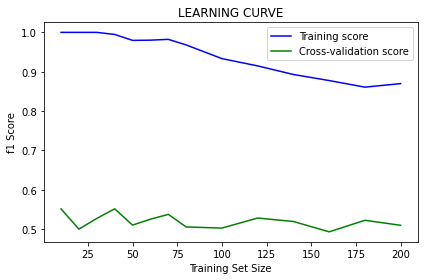

In [32]:
plot_learning_curve(estimator = lr_clf,X=X_train,y=y_train)

As the size of training set increases, the validation score increases

**Lets fit the model**

In [33]:
lr_clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1e-05, random_state=0,
                                    solver='liblinear'))])

**Now lets try svm with rbf kernel**

In [34]:
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel = 'rbf',C=1))

In [35]:
scores = cross_val_score(svm_clf, X_train, y_train, cv=cv_n,scoring='f1')
whole_cross_val_scores['SVM_clf'] = scores

**Lets get the mean f1 score**

In [36]:
print(scores.mean(),scores.std())

0.5502506462017849 0.06992343512325219


**Svm with rbf kernel worked better than logistic regression for this dataset**

**Lets further evaluate the model  with learning curve**

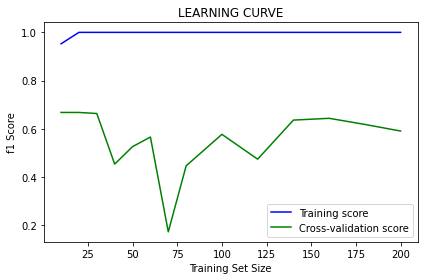

In [37]:
plot_learning_curve(estimator = svm_clf,X=X_train,y=y_train)

**Fit model**

In [38]:
svm_clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, gamma='auto'))])

**We will try simple naive bayes classifier**

As Naive Bayes is not based on distance or gradient descent, we will skip scaling as it is not required.

In [39]:
Naiveclf = GaussianNB()

In [40]:
scores = cross_val_score(Naiveclf, X_train, y_train, cv=cv_n,scoring='f1')
whole_cross_val_scores['Naiveclf'] = scores

**Lets get the mean f1 score**

In [41]:
print(scores.mean(),scores.std())

0.5528583384529405 0.09274944055799142


**Lets plot the learning curve**

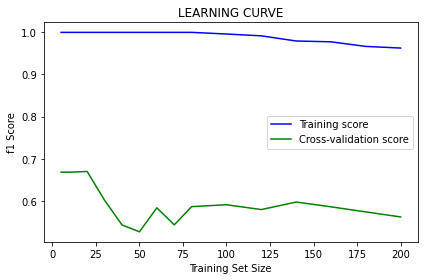

In [42]:
plot_learning_curve(estimator = Naiveclf,X=X_train,y=y_train)

**Lets fit the model**

In [43]:
Naiveclf.fit(X_train,y_train)

GaussianNB()

**We will try to further tune svm hyperparameters with the help of GridSearchCV**

In [44]:
svcpipe = Pipeline([
        ('scale', StandardScaler()),
        ('clf', SVC())])

parameter_space={
        'clf__kernel': ['linear', 'rbf', 'poly'], 
        'clf__gamma': ['auto', 1e-3, 1e-4],
        'clf__C': [0.01, .1, 1, 10, 100, 1000],
        }

In [45]:
GridSearchCVSVMclf = GridSearchCV(svcpipe, param_grid = parameter_space, cv=cv_n,scoring = 'f1')

In [46]:
GridSearchCVSVMclf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [0.01, 0.1, 1, 10, 100, 1000],
                         'clf__gamma': ['auto', 0.001, 0.0001],
                         'clf__kernel': ['linear', 'rbf', 'poly']},
             scoring='f1')

**List the best params**

In [47]:
GridSearchCVSVMclf.best_params_

{'clf__C': 0.01, 'clf__gamma': 'auto', 'clf__kernel': 'poly'}

**Lets create new svm using the best parameters obtained**

In [48]:
svm_opt_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel = 'rbf',C=10))

In [49]:
scores = cross_val_score(svm_opt_clf, X_train, y_train, cv=cv_n,scoring='f1')
whole_cross_val_scores['SVMOpt_clf'] = scores

**Lets get the mean f1 score**

In [50]:
print(scores.mean(),scores.std())

0.5525704501337394 0.05836492034591462


**Lets plot the learning curve**

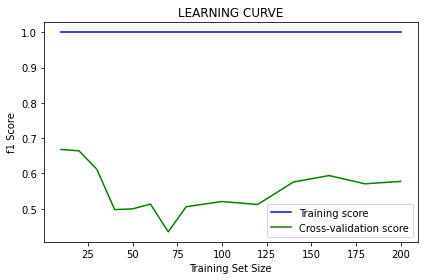

In [51]:
plot_learning_curve(estimator = svm_opt_clf,X=X_train,y=y_train)

**Fit the model**

In [52]:
svm_opt_clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma='auto'))])

**Comparison of distribution f1 score for the above models in cross validation**

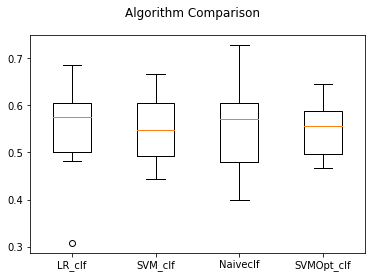

In [53]:

boxplot(whole_cross_val_scores.values(),whole_cross_val_scores.keys())

**Lets evaluate the all model on test set**

In [54]:
from sklearn.metrics import classification_report

In [55]:
lr_y_pred = lr_clf.predict(X_test)
svmclf_y_pred = svm_clf.predict(X_test)
svmoptclf_y_pred = svm_opt_clf.predict(X_test)
Naiveclf_y_pred = Naiveclf.predict(X_test)

In [56]:
print('Logistic Regression\n',classification_report(y_true = y_test,y_pred = lr_y_pred))

Logistic Regression
               precision    recall  f1-score   support

           0       0.66      0.47      0.55        40
           1       0.59      0.75      0.66        40

    accuracy                           0.61        80
   macro avg       0.62      0.61      0.61        80
weighted avg       0.62      0.61      0.61        80



In [57]:
print('SVM\n',classification_report(y_true = y_test,y_pred =svmclf_y_pred))

SVM
               precision    recall  f1-score   support

           0       0.66      0.47      0.55        40
           1       0.59      0.75      0.66        40

    accuracy                           0.61        80
   macro avg       0.62      0.61      0.61        80
weighted avg       0.62      0.61      0.61        80



In [58]:
print('Hyperparmter tuned SVM\n',classification_report(y_true = y_test,y_pred = svmoptclf_y_pred))

Hyperparmter tuned SVM
               precision    recall  f1-score   support

           0       0.63      0.60      0.62        40
           1       0.62      0.65      0.63        40

    accuracy                           0.62        80
   macro avg       0.63      0.62      0.62        80
weighted avg       0.63      0.62      0.62        80



In [59]:
print('Naive Bayes\n',classification_report(y_true = y_test,y_pred = Naiveclf_y_pred))

Naive Bayes
               precision    recall  f1-score   support

           0       0.63      0.55      0.59        40
           1       0.60      0.68      0.64        40

    accuracy                           0.61        80
   macro avg       0.61      0.61      0.61        80
weighted avg       0.61      0.61      0.61        80



<h1>Conclusion</h1>

The best performing model on test set was the tuned svm which provided slightly better results than other model on test set.

None of the models could achieve test f1 score of 0.9. The reason are:<br>
Few training samples and large number of features.<br>
All the models seemed to had better training score compared with validation score in learning curve. This shows models might be over fitting